In [6]:
%tensorflow_version 2.x]
import tensorflow
tensorflow.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x]`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


'2.2.0'

In [7]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [59]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers, regularizers
import h5py

#Loading the dataset

In [9]:
from google.colab import drive

In [11]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [18]:
#Opening file as read only
data_SVHN = h5py.File('/content/drive/My Drive/GL dataset/SVHN_single_grey1.h5' , 'r')

In [19]:
#Loading train, test and validation set
X_train = data_SVHN  ['X_train'][:]
y_train = data_SVHN ['y_train'][:]

X_test = data_SVHN ['X_test'] [:]
y_test = data_SVHN ['y_test'][:]        

X_val = data_SVHN ['X_val'] [:]
y_val = data_SVHN ['y_val'] [:]

In [20]:
#Close the file
data_SVHN.close

<bound method File.close of <HDF5 file "SVHN_single_grey1.h5" (mode r)>>

#Data Evaluation

In [21]:
list(data_SVHN.values())

[<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">,
 <HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">,
 <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">,
 <HDF5 dataset "y_test": shape (18000,), type "|u1">,
 <HDF5 dataset "y_train": shape (42000,), type "|u1">,
 <HDF5 dataset "y_val": shape (60000,), type "|u1">]

In [22]:
print('Shape of X_train is ', X_train.shape)
print('Shape of y_train is ', y_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of y_test is ', y_test.shape)
print('Shape of X_val is ', X_val.shape)
print('Shape of y_val is ', y_val.shape)

Shape of X_train is  (42000, 32, 32)
Shape of y_train is  (42000,)
Shape of X_test is  (18000, 32, 32)
Shape of y_test is  (18000,)
Shape of X_val is  (60000, 32, 32)
Shape of y_val is  (60000,)


Label: 6


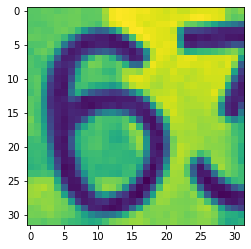

In [23]:
#Visualising using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1]))
plt.imshow(X_train[1])

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


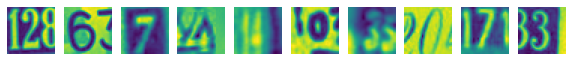

In [24]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    print('label for each of the below image: %s' % (y_train[0:10][i]))
plt.show()

In [25]:
#Reshaping
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(60000, 1024)
(18000, 1024)


#Normalizing the images and Hot encoding target

In [26]:
#Normalising from 0-255 to 0-1
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test/255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


In [27]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(42000, 1024) (60000, 1024) (18000, 1024) (42000,) (60000,) (18000,)


In [28]:
#One-hot encoding class vector
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


#Building the NN Model

1. Simple NN model

Building a model with 5 layers : 4 layers with 50 neurons and one output layer with 10 neurons

In [97]:
#Building the simple NN model
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [98]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_data=(X_val, y_val), verbose =1)

Epoch 1/100
840/840 [==============================] - 3s 4ms/step - loss: 2.3052 - accuracy: 0.1033 - val_loss: 2.3022 - val_accuracy: 0.1094
Epoch 2/100
840/840 [==============================] - 3s 4ms/step - loss: 2.3009 - accuracy: 0.1095 - val_loss: 2.3000 - val_accuracy: 0.1111
Epoch 3/100
840/840 [==============================] - 3s 4ms/step - loss: 2.2993 - accuracy: 0.1110 - val_loss: 2.2987 - val_accuracy: 0.1107
Epoch 4/100
840/840 [==============================] - 3s 4ms/step - loss: 2.2981 - accuracy: 0.1134 - val_loss: 2.2976 - val_accuracy: 0.1196
Epoch 5/100
840/840 [==============================] - 3s 4ms/step - loss: 2.2969 - accuracy: 0.1225 - val_loss: 2.2965 - val_accuracy: 0.1241
Epoch 6/100
840/840 [==============================] - 3s 4ms/step - loss: 2.2958 - accuracy: 0.1271 - val_loss: 2.2953 - val_accuracy: 0.1312
Epoch 7/100
840/840 [==============================] - 3s 4ms/step - loss: 2.2945 - accuracy: 0.1332 - val_loss: 2.2939 - val_accuracy: 0.1353

In [99]:
Results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 1ms/step - loss: 1.0896 - accuracy: 0.6661


In [100]:
print('Test accuracy: ', Results[1])

Test accuracy:  0.6661111116409302


2. Model adding Batch Normalization

In [101]:
#Adding Batch Normalization
def mlp_model1():
    model = Sequential()

    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [102]:
model1 = mlp_model1()
history1 = model1.fit(X_train, y_train, batch_size = 50, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
840/840 [==============================] - 4s 4ms/step - loss: 2.4178 - accuracy: 0.1242 - val_loss: 2.3132 - val_accuracy: 0.1564
Epoch 2/100
840/840 [==============================] - 3s 4ms/step - loss: 2.2035 - accuracy: 0.2027 - val_loss: 2.1127 - val_accuracy: 0.2487
Epoch 3/100
840/840 [==============================] - 3s 4ms/step - loss: 2.0539 - accuracy: 0.2691 - val_loss: 1.9704 - val_accuracy: 0.3112
Epoch 4/100
840/840 [==============================] - 3s 4ms/step - loss: 1.9352 - accuracy: 0.3274 - val_loss: 1.8431 - val_accuracy: 0.3738
Epoch 5/100
840/840 [==============================] - 3s 4ms/step - loss: 1.8276 - accuracy: 0.3802 - val_loss: 1.7411 - val_accuracy: 0.4230
Epoch 6/100
840/840 [==============================] - 3s 4ms/step - loss: 1.7352 - accuracy: 0.4280 - val_loss: 1.6405 - val_accuracy: 0.4665
Epoch 7/100
840/840 [==============================] - 3s 4ms/step - loss: 1.6450 - accuracy: 0.4660 - val_loss: 1.5565 - val_accuracy: 0.5037

In [103]:
Results1 = model1.evaluate(X_test, y_test)

563/563 [==============================] - 1s 1ms/step - loss: 0.8064 - accuracy: 0.7476


Test accuracy increases from 66% to 74.7% on adding Batch Normalization

In [104]:
print('Test accuracy: ', Results1[1])

Test accuracy:  0.7475555539131165


#Changing hyperparameters

#1. Adding more hidden layers

In [105]:
#Tweaking hyperparameters to check if a better accuracy is possible
#Adding 2 more layers of 50 neurons
def mlp_model2():
    model = Sequential()

    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [106]:
model2 = mlp_model2()
history2 = model2.fit(X_train, y_train, batch_size=100, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
420/420 [==============================] - 3s 7ms/step - loss: 2.5648 - accuracy: 0.1228 - val_loss: 2.4062 - val_accuracy: 0.1477
Epoch 2/100
420/420 [==============================] - 3s 6ms/step - loss: 2.3421 - accuracy: 0.1695 - val_loss: 2.2943 - val_accuracy: 0.1905
Epoch 3/100
420/420 [==============================] - 3s 6ms/step - loss: 2.1961 - accuracy: 0.2126 - val_loss: 2.1688 - val_accuracy: 0.2334
Epoch 4/100
420/420 [==============================] - 3s 6ms/step - loss: 2.0917 - accuracy: 0.2514 - val_loss: 2.0446 - val_accuracy: 0.2725
Epoch 5/100
420/420 [==============================] - 3s 6ms/step - loss: 2.0008 - accuracy: 0.2901 - val_loss: 1.9598 - val_accuracy: 0.3110
Epoch 6/100
420/420 [==============================] - 3s 6ms/step - loss: 1.9309 - accuracy: 0.3221 - val_loss: 1.8916 - val_accuracy: 0.3427
Epoch 7/100
420/420 [==============================] - 3s 6ms/step - loss: 1.8656 - accuracy: 0.3513 - val_loss: 1.8321 - val_accuracy: 0.3711

In [107]:
Results2 = model2.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.8405 - accuracy: 0.7403


The accuracy drops slightly from 74.7% to 74.0%, so we can go with 5 layers itself.

#2. Adding more neurons in each layer

In [108]:
#Increasing number of neurons per layer to 70
def mlp_model3():
    model = Sequential()

    model.add(Dense(70, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(70))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(70))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(70))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [109]:
model3 = mlp_model3()
history3 = model3.fit(X_train, y_train, batch_size=100, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
420/420 [==============================] - 3s 6ms/step - loss: 2.5754 - accuracy: 0.1238 - val_loss: 2.4274 - val_accuracy: 0.1459
Epoch 2/100
420/420 [==============================] - 3s 6ms/step - loss: 2.3284 - accuracy: 0.1867 - val_loss: 2.2570 - val_accuracy: 0.2113
Epoch 3/100
420/420 [==============================] - 3s 7ms/step - loss: 2.1498 - accuracy: 0.2437 - val_loss: 2.0773 - val_accuracy: 0.2715
Epoch 4/100
420/420 [==============================] - 3s 7ms/step - loss: 2.0204 - accuracy: 0.2935 - val_loss: 1.9553 - val_accuracy: 0.3213
Epoch 5/100
420/420 [==============================] - 3s 7ms/step - loss: 1.9194 - accuracy: 0.3396 - val_loss: 1.8603 - val_accuracy: 0.3729
Epoch 6/100
420/420 [==============================] - 3s 6ms/step - loss: 1.8389 - accuracy: 0.3774 - val_loss: 1.7818 - val_accuracy: 0.4058
Epoch 7/100
420/420 [==============================] - 3s 6ms/step - loss: 1.7700 - accuracy: 0.4106 - val_loss: 1.7260 - val_accuracy: 0.4344

In [110]:
Results3 = model3.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.8051 - accuracy: 0.7557


There is an icrease from 74.7% to 75.5%. 
Thus we can try to increase number of neurons futhur and check if it improves the accuracy

In [54]:
#Increasing number of neurons per layer to 100
def mlp_model4():
    model = Sequential()

    model.add(Dense(100, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [55]:
model4 = mlp_model4()
history4 = model4.fit(X_train, y_train, batch_size=100, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
420/420 [==============================] - 3s 8ms/step - loss: 2.5487 - accuracy: 0.1304 - val_loss: 2.3694 - val_accuracy: 0.1612
Epoch 2/100
420/420 [==============================] - 3s 8ms/step - loss: 2.3115 - accuracy: 0.1920 - val_loss: 2.2271 - val_accuracy: 0.2213
Epoch 3/100
420/420 [==============================] - 3s 8ms/step - loss: 2.1325 - accuracy: 0.2466 - val_loss: 2.0647 - val_accuracy: 0.2778
Epoch 4/100
420/420 [==============================] - 3s 8ms/step - loss: 1.9872 - accuracy: 0.3061 - val_loss: 1.9163 - val_accuracy: 0.3387
Epoch 5/100
420/420 [==============================] - 3s 8ms/step - loss: 1.8776 - accuracy: 0.3531 - val_loss: 1.8169 - val_accuracy: 0.3830
Epoch 6/100
420/420 [==============================] - 3s 8ms/step - loss: 1.7907 - accuracy: 0.3962 - val_loss: 1.7338 - val_accuracy: 0.4219
Epoch 7/100
420/420 [==============================] - 3s 8ms/step - loss: 1.7153 - accuracy: 0.4318 - val_loss: 1.6673 - val_accuracy: 0.4542

In [57]:
Results4 = model4.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.7252 - accuracy: 0.7836


Accuracy increases again from 75.5% to 78.36%. Let us try and increase number of neurons again to see if there is improvement in accuracy.

In [37]:
#Increasing number of neurons per layer to 200
def mlp_model8():
    model = Sequential()

    model.add(Dense(200, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [38]:
model8 = mlp_model8()
history8 = model8.fit(X_train, y_train, batch_size = 100, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
420/420 [==============================] - 6s 13ms/step - loss: 2.5241 - accuracy: 0.1352 - val_loss: 2.3199 - val_accuracy: 0.1715
Epoch 2/100
420/420 [==============================] - 5s 13ms/step - loss: 2.2111 - accuracy: 0.2162 - val_loss: 2.1171 - val_accuracy: 0.2589
Epoch 3/100
420/420 [==============================] - 5s 13ms/step - loss: 2.0444 - accuracy: 0.2886 - val_loss: 1.9682 - val_accuracy: 0.3261
Epoch 4/100
420/420 [==============================] - 6s 13ms/step - loss: 1.9127 - accuracy: 0.3499 - val_loss: 1.8340 - val_accuracy: 0.3855
Epoch 5/100
420/420 [==============================] - 5s 13ms/step - loss: 1.7954 - accuracy: 0.4015 - val_loss: 1.7198 - val_accuracy: 0.4392
Epoch 6/100
420/420 [==============================] - 6s 13ms/step - loss: 1.6977 - accuracy: 0.4453 - val_loss: 1.6262 - val_accuracy: 0.4787
Epoch 7/100
420/420 [==============================] - 6s 15ms/step - loss: 1.6153 - accuracy: 0.4818 - val_loss: 1.5580 - val_accuracy:

In [39]:
Results8 = model8.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.7913


Again accuracy increases from 78.14% to 79.13%. But now the model seems to be startin to over fit. Thus, we can go with 100 neurons.

#3. Change learning rate

In [114]:
#Changing learning rate to 0.0001
def mlp_model5():
    model = Sequential()

    model.add(Dense(100, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.0001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model


In [115]:
model5 = mlp_model5()
history5 = model5.fit(X_train, y_train, batch_size=100, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
420/420 [==============================] - 3s 7ms/step - loss: 2.7133 - accuracy: 0.0975 - val_loss: 2.5943 - val_accuracy: 0.1012
Epoch 2/100
420/420 [==============================] - 3s 6ms/step - loss: 2.6797 - accuracy: 0.1054 - val_loss: 2.6637 - val_accuracy: 0.1086
Epoch 3/100
420/420 [==============================] - 3s 7ms/step - loss: 2.6419 - accuracy: 0.1109 - val_loss: 2.6364 - val_accuracy: 0.1143
Epoch 4/100
420/420 [==============================] - 3s 6ms/step - loss: 2.6099 - accuracy: 0.1143 - val_loss: 2.6036 - val_accuracy: 0.1211
Epoch 5/100
420/420 [==============================] - 3s 6ms/step - loss: 2.5769 - accuracy: 0.1225 - val_loss: 2.5683 - val_accuracy: 0.1242
Epoch 6/100
420/420 [==============================] - 3s 6ms/step - loss: 2.5473 - accuracy: 0.1268 - val_loss: 2.5354 - val_accuracy: 0.1295
Epoch 7/100
420/420 [==============================] - 3s 6ms/step - loss: 2.5214 - accuracy: 0.1300 - val_loss: 2.5105 - val_accuracy: 0.1349

In [116]:
Results5 = model5.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 1.5246 - accuracy: 0.5259


Accuracy seems to dip from 78.14% to 52.59% which indicates this is not good learning rate

In [117]:
#Changing learning rate to 0.01
def mlp_model6():
    model = Sequential()

    model.add(Dense(100, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model


In [118]:
model6 = mlp_model6()
history6 = model6.fit(X_train, y_train, batch_size = 100, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
420/420 [==============================] - 3s 8ms/step - loss: 1.9550 - accuracy: 0.3365 - val_loss: 1.7512 - val_accuracy: 0.4227
Epoch 2/100
420/420 [==============================] - 3s 7ms/step - loss: 1.4002 - accuracy: 0.5658 - val_loss: 1.4131 - val_accuracy: 0.5601
Epoch 3/100
420/420 [==============================] - 3s 8ms/step - loss: 1.1973 - accuracy: 0.6377 - val_loss: 1.2123 - val_accuracy: 0.6242
Epoch 4/100
420/420 [==============================] - 3s 7ms/step - loss: 1.0814 - accuracy: 0.6723 - val_loss: 1.1925 - val_accuracy: 0.6279
Epoch 5/100
420/420 [==============================] - 3s 7ms/step - loss: 0.9996 - accuracy: 0.6965 - val_loss: 1.1328 - val_accuracy: 0.6442
Epoch 6/100
420/420 [==============================] - 3s 8ms/step - loss: 0.9400 - accuracy: 0.7139 - val_loss: 1.0855 - val_accuracy: 0.6559
Epoch 7/100
420/420 [==============================] - 3s 8ms/step - loss: 0.8861 - accuracy: 0.7302 - val_loss: 1.0223 - val_accuracy: 0.6774

In [119]:
Results6 = model6.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.9374 - accuracy: 0.7504


Here also accuracy dips from 78.14% to 75%. Thus it is better to have learning rate of 0.001.

#4. Using alternate kernel initializer

In [120]:
 def mlp_model7():
    
    model = Sequential()

    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.001)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    return model

In [121]:
 # Fit the model

model7 = mlp_model7()
history7 = model.fit(X_train, y_train, batch_size = 100, validation_data=(X_val, y_val), epochs = 100, verbose =1)

Epoch 1/100
420/420 [==============================] - 2s 5ms/step - loss: 1.0733 - accuracy: 0.6651 - val_loss: 1.0754 - val_accuracy: 0.6654
Epoch 2/100
420/420 [==============================] - 2s 5ms/step - loss: 1.0695 - accuracy: 0.6663 - val_loss: 1.0684 - val_accuracy: 0.6685
Epoch 3/100
420/420 [==============================] - 2s 5ms/step - loss: 1.0663 - accuracy: 0.6685 - val_loss: 1.0677 - val_accuracy: 0.6686
Epoch 4/100
420/420 [==============================] - 2s 5ms/step - loss: 1.0623 - accuracy: 0.6688 - val_loss: 1.0644 - val_accuracy: 0.6702
Epoch 5/100
420/420 [==============================] - 2s 5ms/step - loss: 1.0586 - accuracy: 0.6710 - val_loss: 1.0623 - val_accuracy: 0.6730
Epoch 6/100
420/420 [==============================] - 2s 5ms/step - loss: 1.0556 - accuracy: 0.6725 - val_loss: 1.0541 - val_accuracy: 0.6741
Epoch 7/100
420/420 [==============================] - 2s 5ms/step - loss: 1.0527 - accuracy: 0.6716 - val_loss: 1.0552 - val_accuracy: 0.6746

In [125]:
Results7 = model7.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 2.4315 - accuracy: 0.1038


Clearly the accuracy dips very low with he_normal kernel initializer. The default Glorot initializer seems to be performing better.

#5. Change lambda values

In [45]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 100
    output_nodes = 10

    model = Sequential()
    
    model.add(Dense(hidden_nodes, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(hidden_nodes))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(hidden_nodes))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(hidden_nodes))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, validation_data=(X_val, y_val), batch_size=1000, verbose= 1)
    score = model.evaluate(X_test, y_test, verbose=0)
    
    return score

In [46]:
lr = 0.001
Lambda = 0.001
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
42/42 [==============================] - 2s 46ms/step - loss: 2.6277 - accuracy: 0.1150 - val_loss: 2.3608 - val_accuracy: 0.1040
Epoch 2/100
42/42 [==============================] - 2s 41ms/step - loss: 2.3765 - accuracy: 0.1649 - val_loss: 2.3486 - val_accuracy: 0.1137
Epoch 3/100
42/42 [==============================] - 2s 42ms/step - loss: 2.2234 - accuracy: 0.2157 - val_loss: 2.3094 - val_accuracy: 0.1313
Epoch 4/100
42/42 [==============================] - 2s 42ms/step - loss: 2.1116 - accuracy: 0.2633 - val_loss: 2.2607 - val_accuracy: 0.1724
Epoch 5/100
42/42 [==============================] - 2s 41ms/step - loss: 2.0171 - accuracy: 0.3097 - val_loss: 2.2068 - val_accuracy: 0.2213
Epoch 6/100
42/42 [==============================] - 2s 41ms/step - loss: 1.9288 - accuracy: 0.3533 - val_loss: 2.1332 - val_accuracy: 0.2697
Epoch 7/100
42/42 [==============================] - 2s 43ms/step - loss: 1.8431 - accuracy: 0.3955 - val_loss: 2.0578 - val_accuracy: 0.3049
Epoch 

[0.7931897044181824, 0.7587222456932068]

Lambda value of 0.001 overfits.

In [47]:
lr = 0.001
Lambda = 0.0001
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
42/42 [==============================] - 2s 45ms/step - loss: 2.5989 - accuracy: 0.1197 - val_loss: 2.3023 - val_accuracy: 0.1199
Epoch 2/100
42/42 [==============================] - 2s 41ms/step - loss: 2.3666 - accuracy: 0.1737 - val_loss: 2.2869 - val_accuracy: 0.1394
Epoch 3/100
42/42 [==============================] - 2s 41ms/step - loss: 2.1794 - accuracy: 0.2341 - val_loss: 2.2659 - val_accuracy: 0.1424
Epoch 4/100
42/42 [==============================] - 2s 41ms/step - loss: 2.0380 - accuracy: 0.2907 - val_loss: 2.2146 - val_accuracy: 0.1744
Epoch 5/100
42/42 [==============================] - 2s 42ms/step - loss: 1.9193 - accuracy: 0.3435 - val_loss: 2.1122 - val_accuracy: 0.2551
Epoch 6/100
42/42 [==============================] - 2s 42ms/step - loss: 1.8180 - accuracy: 0.3883 - val_loss: 1.9996 - val_accuracy: 0.3195
Epoch 7/100
42/42 [==============================] - 2s 42ms/step - loss: 1.7305 - accuracy: 0.4325 - val_loss: 1.8859 - val_accuracy: 0.3780
Epoch 

[0.7571341395378113, 0.7736111283302307]

Lambda value of 0.0001 also overfits

In [48]:
lr = 0.001
Lambda = 0.01
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
42/42 [==============================] - 2s 46ms/step - loss: 2.7550 - accuracy: 0.1200 - val_loss: 2.4837 - val_accuracy: 0.0998
Epoch 2/100
42/42 [==============================] - 2s 41ms/step - loss: 2.4790 - accuracy: 0.1824 - val_loss: 2.4734 - val_accuracy: 0.1158
Epoch 3/100
42/42 [==============================] - 2s 41ms/step - loss: 2.2880 - accuracy: 0.2497 - val_loss: 2.4340 - val_accuracy: 0.1573
Epoch 4/100
42/42 [==============================] - 2s 41ms/step - loss: 2.1494 - accuracy: 0.3107 - val_loss: 2.3705 - val_accuracy: 0.2073
Epoch 5/100
42/42 [==============================] - 2s 41ms/step - loss: 2.0364 - accuracy: 0.3628 - val_loss: 2.2724 - val_accuracy: 0.2645
Epoch 6/100
42/42 [==============================] - 2s 41ms/step - loss: 1.9397 - accuracy: 0.4106 - val_loss: 2.1580 - val_accuracy: 0.3297
Epoch 7/100
42/42 [==============================] - 2s 41ms/step - loss: 1.8546 - accuracy: 0.4501 - val_loss: 2.0503 - val_accuracy: 0.3823
Epoch 

[0.7857251763343811, 0.773888885974884]

In [49]:
lr = 0.001
Lambda = 0.1
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
42/42 [==============================] - 2s 45ms/step - loss: 4.2400 - accuracy: 0.1248 - val_loss: 3.8451 - val_accuracy: 0.1098
Epoch 2/100
42/42 [==============================] - 2s 41ms/step - loss: 3.7161 - accuracy: 0.1861 - val_loss: 3.6006 - val_accuracy: 0.1260
Epoch 3/100
42/42 [==============================] - 2s 41ms/step - loss: 3.3056 - accuracy: 0.2530 - val_loss: 3.3778 - val_accuracy: 0.1520
Epoch 4/100
42/42 [==============================] - 2s 41ms/step - loss: 2.9812 - accuracy: 0.3102 - val_loss: 3.1518 - val_accuracy: 0.1972
Epoch 5/100
42/42 [==============================] - 2s 41ms/step - loss: 2.7111 - accuracy: 0.3629 - val_loss: 2.9329 - val_accuracy: 0.2467
Epoch 6/100
42/42 [==============================] - 2s 41ms/step - loss: 2.4800 - accuracy: 0.4102 - val_loss: 2.6892 - val_accuracy: 0.3207
Epoch 7/100
42/42 [==============================] - 2s 40ms/step - loss: 2.2859 - accuracy: 0.4481 - val_loss: 2.4836 - val_accuracy: 0.3629
Epoch 

[0.760826051235199, 0.7746111154556274]

Lambda seems not to be making much difference to the model.

#Choosing the best model

The best model seems to be the model with 5 layers of 4 hidden layers with 100 neurons each and output layer with 10 neurons having a learning rate of 0.001.

In [56]:
#Best model summary
model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 100)               102500    
_________________________________________________________________
batch_normalization_60 (Batc (None, 100)               400       
_________________________________________________________________
activation_60 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_61 (Batc (None, 100)               400       
_________________________________________________________________
activation_61 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 100)             

#Confusion matrix

In [61]:
#Opening file as read only
data_SVHN = h5py.File('/content/drive/My Drive/GL dataset/SVHN_single_grey1.h5' , 'r')

In [62]:
#Loading target value of test

y_target = data_SVHN ['y_test'][:]       

In [63]:
#Close the file
data_SVHN.close

<bound method File.close of <HDF5 file "SVHN_single_grey1.h5" (mode r)>>

In [74]:
Y_pred_cls = model4.predict_classes(X_test, batch_size=200, verbose=0)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_target, Y_pred_cls))

print(classification_report(y_target, Y_pred_cls))

[[1448   59   20   30   36   36   46   34   40   65]
 [  22 1546   22   36   55   21   15   70   25   16]
 [  22   51 1424   25   27   34   17  118   29   56]
 [  26   83   55 1159   24  212   25   56   50   29]
 [  25   78   38   27 1477   45   42   20   22   38]
 [  26   28   20   69   18 1455   51   16   53   32]
 [  52   45   18   20   59  110 1419   16   77   16]
 [  25   77   63   27   11   26   13 1524   16   26]
 [  48   63   30   42   37  104  110   15 1283   80]
 [  69   63   27   41   23  101   21   38   52 1369]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1814
           1       0.74      0.85      0.79      1828
           2       0.83      0.79      0.81      1803
           3       0.79      0.67      0.73      1719
           4       0.84      0.82      0.83      1812
           5       0.68      0.82      0.74      1768
           6       0.81      0.77      0.79      1832
           7       0.80      0.84   